In [10]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data

%load_ext autoreload
%autoreload 1
%aimport data
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
b = Reservoir(n_res=4000, input_scale=1, train_method='explicit', train_param=1e1,
                          weights_type='complex gaussian', random_projection='simulation',
                          activation_fun='phase', activation_param=1,
                          encoding_method='phase', encoding_param=1, forget=100)

In [19]:
input_data, y = data.memory(sequence_length=2000)
b.fit(input_data, y)

Start of training...
Initialization finished. Elapsed time:
4.377461910247803
100%|██████████| 2000/2000 [00:33<00:00, 59.29it/s]
Iterations finished. Elapsed time:
38.11413311958313
Training finished. Elapsed time:
55.68661284446716
Training score:
1.0


Reservoir(activation_fun='phase', activation_param=1, encoding_method='phase',
     encoding_param=1, forget=100, input_dim=1, input_scale=1, n_res=4000,
     opu_transform=None, random_projection='simulation',
     random_state=<mtrand.RandomState object at 0x7fa2880819d8>,
     res_scale=1, save=0, train_method='explicit', train_param=10.0,
     verbose=1, weights_type='complex gaussian')

In [20]:
input_data, y = data.memory(sequence_length=1000)
pred_output, valid_score = b.score(input_data, np.ravel(y[:,b.forget:,:]))

Start of testing...
Initialization finished. Elapsed time:
0.0007908344268798828
100%|██████████| 1000/1000 [00:16<00:00, 59.46it/s]
Iterations finished. Elapsed time:
16.820661783218384
Testing finished. Elapsed time:
16.82436227798462
Testing finished. Elapsed time:
55.68661284446716
Testing score:
0.9064519592670987


/home/jonathan/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


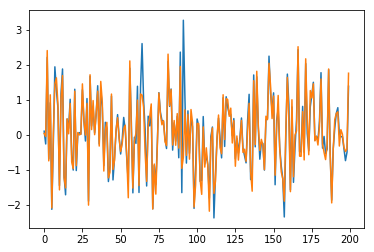

In [21]:
true_output = np.ravel(y[:, b.forget:, :])
pred_output = np.ravel(pred_output)

plt.plot(true_output[:200])
plt.plot(pred_output[:200])
plt.show()

In [22]:
# Note: We need to implement the training with complex values. 
# In Python, sklearn does not handle complex numbers
# We use lstsq from scipy.linalg, but this does not include regularization